In [1]:
import numpy as np
from CGN import solve_cgn
import matplotlib.pyplot as plt

In [2]:
def generate_matrix_given_cond_num(n: int, kappa: int, m = None): 
    if m == None:
        m = int(n/2)
    r_min = np.min((n, m))
    r_max = np.max((n, m))
    sing_vals = np.linspace(kappa, 1, r_min)
    U, _ = np.linalg.qr(np.random.randn(r_max,r_max)) # this should make a random orthogonal matrix
    V, _ = np.linalg.qr(np.random.randn(r_min,r_min)) 
    Sigma = np.vstack((np.diag(sing_vals), np.zeros(shape = (r_max - r_min,r_min))))
    A = U @ Sigma @ V

    return A

In [6]:
N = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
kappa = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]

matrices = {}

for NN in N:
    matrices[NN] = {}
    for kk in kappa:
        matrices[NN][kk] = generate_matrix_given_cond_num(NN, kk)

In [7]:
res = {}

dim = 4
while True:
    if dim > 2048:
        break

    b = np.random.rand(dim, )

    res[dim] = {}

    for key in matrices[dim]:
        res[dim][key] = solve_cgn(matrices[dim][key], b)[:2]

    dim *= 2

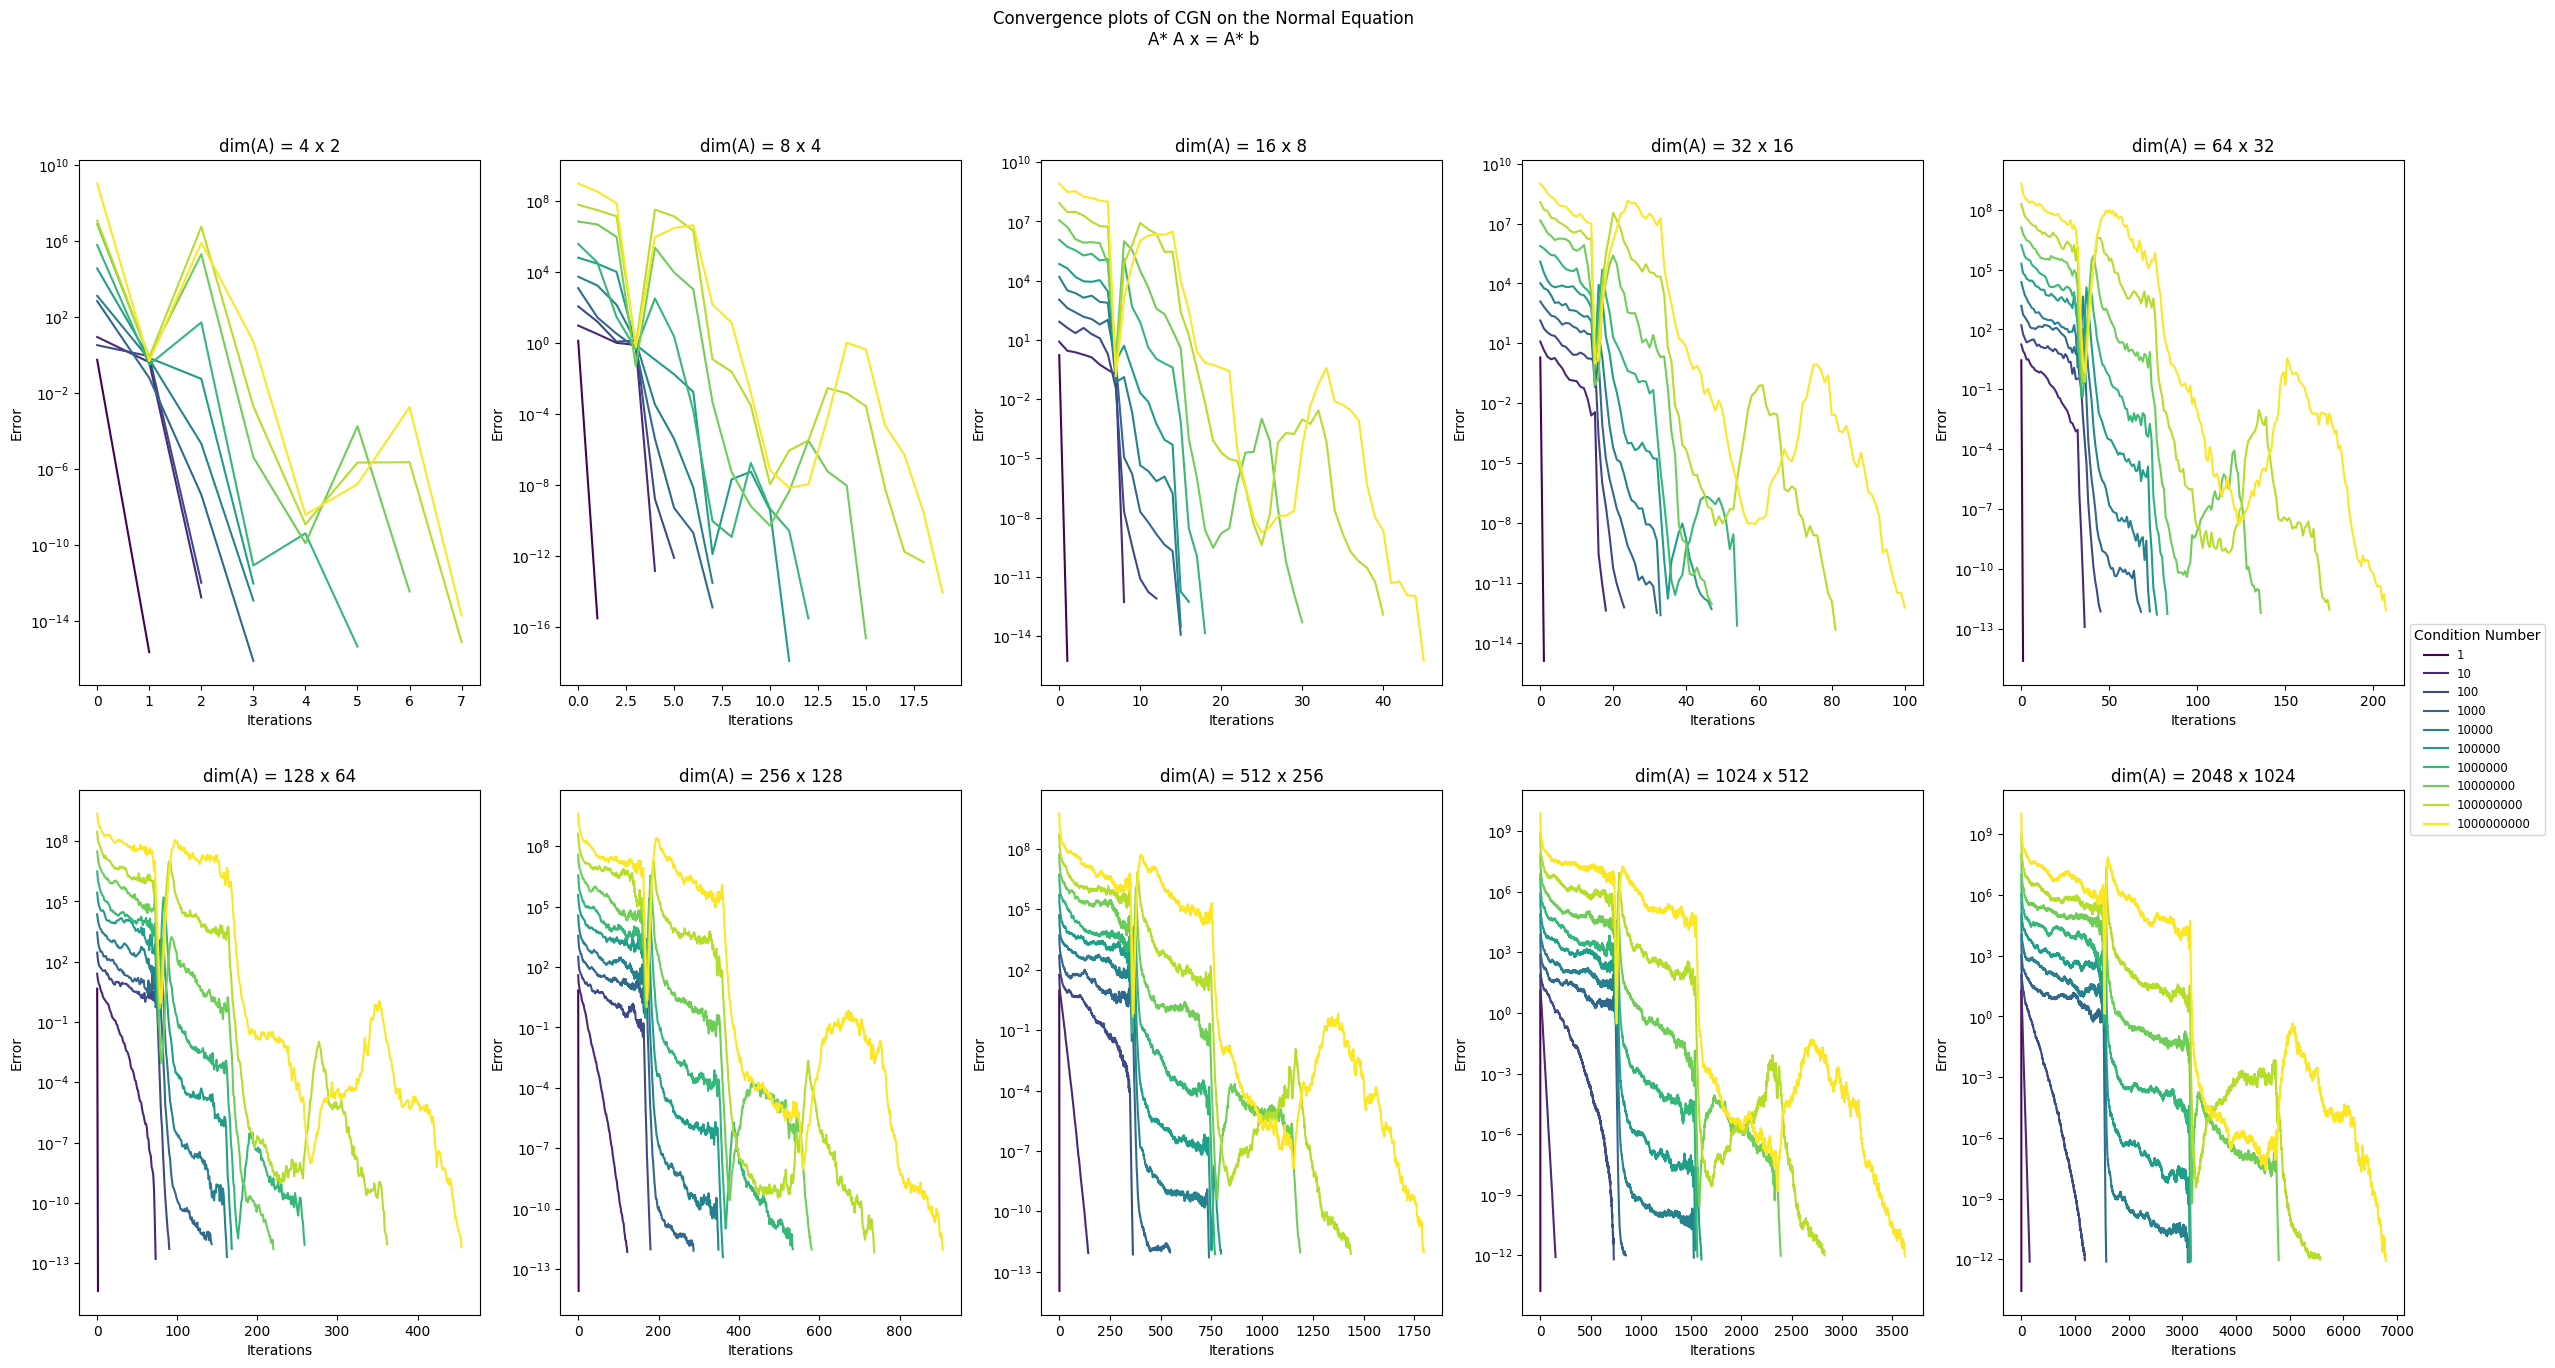

In [21]:
colors = plt.cm.viridis(np.linspace(0, 1, len(kappa)))  # Create a colormap

fig, ax = plt.subplots(2, 5, figsize=(30, 15))

for i, dim in enumerate([4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]):
    row, col = divmod(i, 5)
    for j, kk in enumerate(kappa):
        ax[row, col].plot(res[dim][kk][1], label=f'{int(kk)}' if i == 0 else "", color=colors[j])
        ax[row, col].set_yscale("log")
    ax[row, col].set_title(f"dim(A) = {dim} x {int(dim/2)}")
    ax[row, col].set_xlabel('Iterations')
    ax[row, col].set_ylabel('Error')

fig.suptitle('Convergence plots of CGN on the Normal Equation\nA* A x = A* b')
fig.legend(bbox_to_anchor=(0.9, 0.5), loc='center left', fontsize='small', title="Condition Number")
